<a href="https://colab.research.google.com/github/justaplan/ehs_data_analysis/blob/master/EHS_Analysis_Yearly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials
import numpy as np
import plotly.express as px

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('1qvK5BkBSLDFKhausgwg8Ai3-3scVwJHGBrJ17fj48tc')
ws = wb.worksheet("Year Data")

# get_all_values gives a list of rows.
rows = ws.get_all_values()


# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df["Incident Rate"] = df["Incident Rate"].astype(float)
df["Frequency Rate"] = df["Frequency Rate"].astype(float)
df["Severity Rate"] = df["Severity Rate"].astype(float)
df["National Incident Rate"] = df["National Incident Rate"].astype(float)
df["Permanent & Contract"] = df["Permanent & Contract"].astype(int)
df["Trainee"] = df["Trainee"].astype(int)
df["Loss Day"] = df["Loss Day"].astype(int)
df["OSHA Case"] = df["OSHA Case"].astype(int)
df["Subcontractor"] = df["Subcontractor"].astype(int)
df

,No,Year,Permanent & Contract,Trainee,Subcontractor,Total Man Hours Worked,OSHA Case,Non OSHA Case,Loss Day,Fatality Rate,Incident Rate,Frequency Rate,Severity Rate,National Incident Rate,National Fatality Rate
0,,2014,307,32,70,942336,4,0,10,0,9.78,4.24,10.61,3.10,4.23
1,,2015,348,70,75,1135872,4,0,2,0,8.11,3.52,1.76,2.81,4.75
2,,2016,389,47,98,1230336,5,0,12,0,9.36,4.06,9.75,2.88,4.86
3,,2017,439,42,135,1419264,5,1,12,0,8.12,3.52,8.46,2.93,4.92
4,,2018,499,65,146,1635840,10,11,13,0,14.08,6.11,7.95,2.40,4.14
5,,2019,591,66,134,1822464,1,6,3,0,1.26,0.55,1.65,2.71,3.83
6,,2020,639,72,136,1951488,3,2,17,0,3.54,1.54,8.71,2.71,3.83


**<h1>Custom Function</h1>**

In [4]:
## custom function
def value_plotting(input1,input2,input3):
  for x,y in zip(input1,input2):
    plt.text(x,y + (input3),s=y)

**<h1>Permanent & Contract, Trainee and Subcontractor Headcount by Years</h1>**

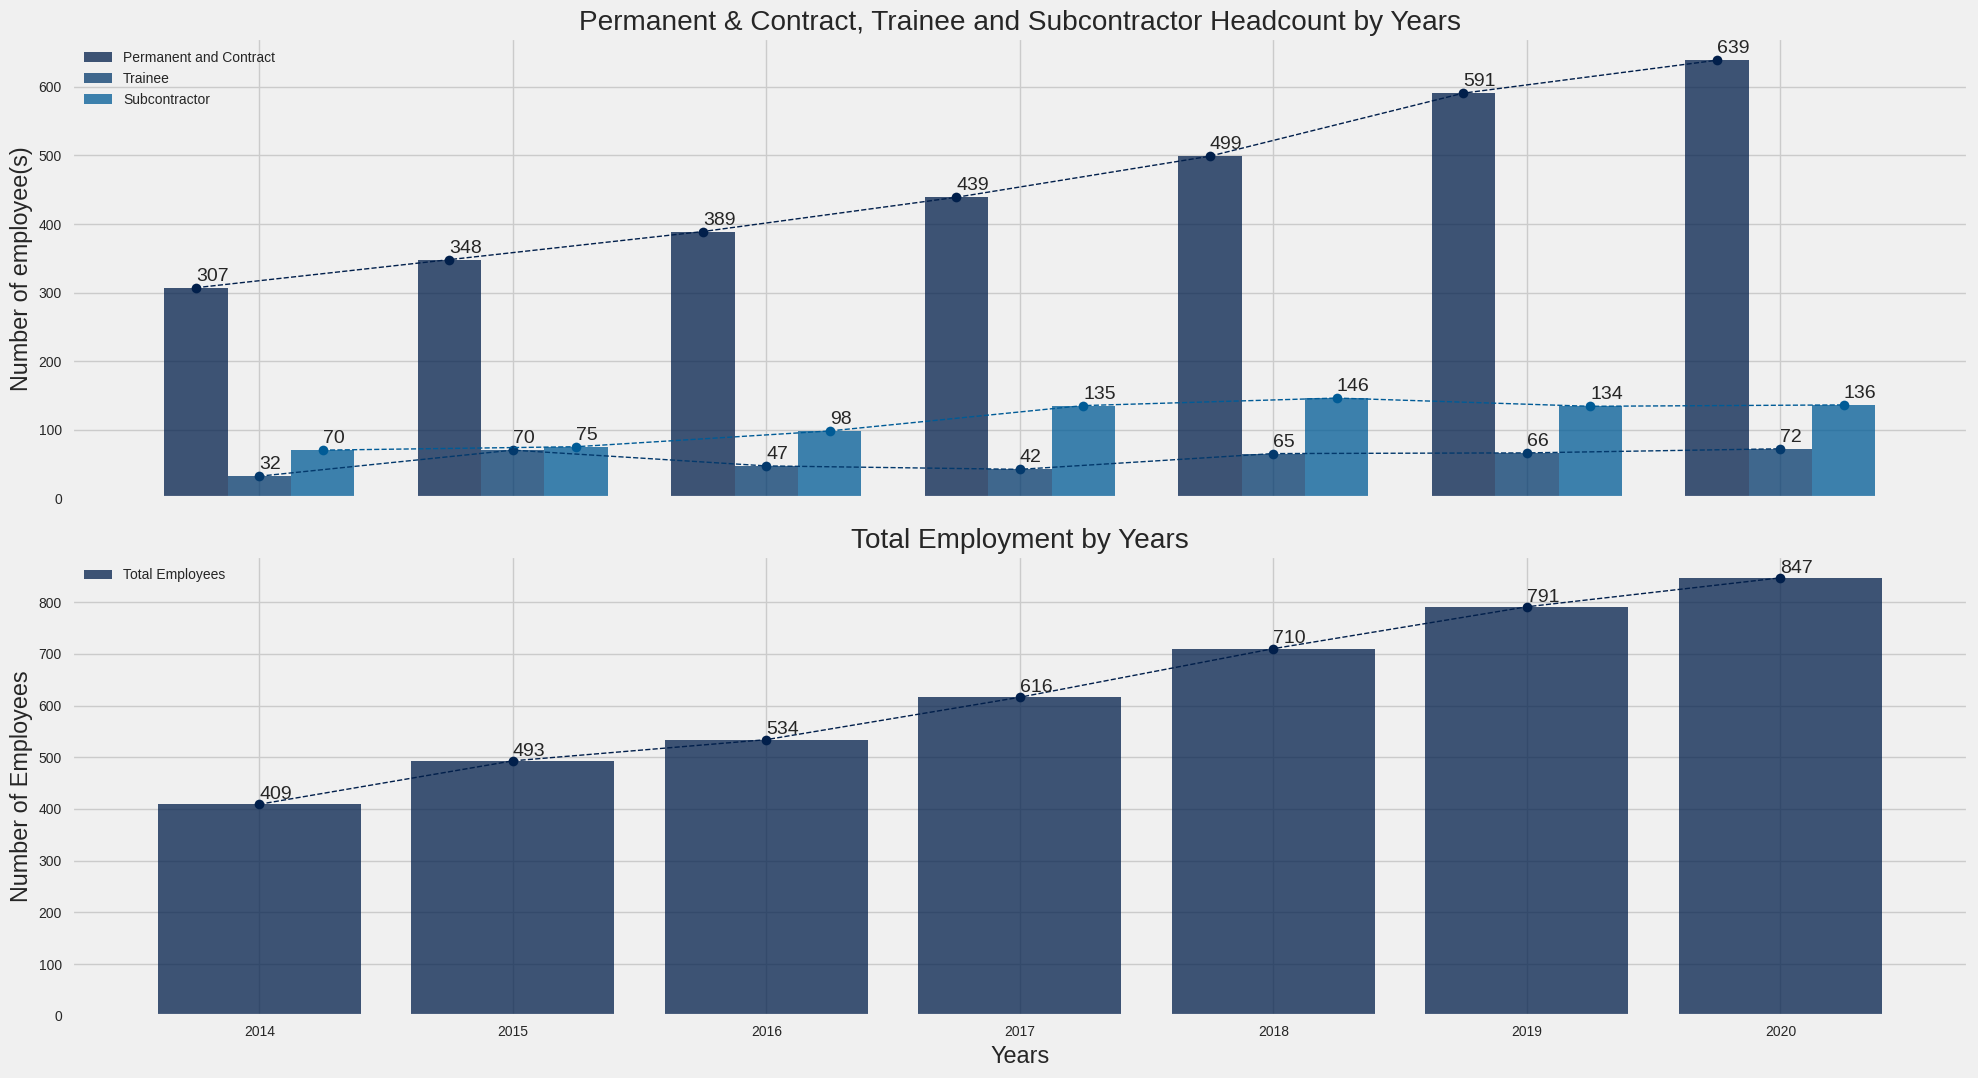

In [9]:
## Chart Size and Style
## plt.figure(figsize=(20,7),dpi=100)
plt.style.use("fivethirtyeight")
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,11),dpi=100,sharex=True)

# ==================================== Chart 1 ==================================== #
## Data Gathering
year = df["Year"]
vper_con = df["Permanent & Contract"]
vtrainee = df["Trainee"]
vsubcon = df["Subcontractor"]

x_indexes = np.arange(len(year))
width = 0.25

## Chart Plotting
ax1.bar(x_indexes - width, vper_con, color="#011f4b", width=width, alpha=0.75,label="Permanent and Contract")
ax1.bar(x_indexes, vtrainee, color="#03396c", width=width, alpha=0.75,label="Trainee")
ax1.bar(x_indexes  + width ,vsubcon, color="#005b96", width=width, alpha=0.75,label="Subcontractor")

ax1.plot(x_indexes - width ,vper_con, color="#011f4b",  linestyle="--", marker="o",linewidth=1)
ax1.plot(x_indexes,vtrainee, color="#03396c",  linestyle="--", marker="o",linewidth=1)
ax1.plot(x_indexes + width,vsubcon, color="#005b96",  linestyle="--", marker="o",linewidth=1)

#3 Title and Labelling
ax1.set_title("Permanent & Contract, Trainee and Subcontractor Headcount by Years")
ax1.set_ylabel("Number of employee(s)")
ax1.set_xticks(x_indexes) 
ax1.set_xticklabels(year)

for x,y in zip(x_indexes - width,vper_con):
    ax1.text(x,y+10,s=y)

for x,y in zip(x_indexes,vtrainee):
    ax1.text(x,y+10,s=y)

for x,y in zip(x_indexes + width,vsubcon):
    ax1.text(x,y+10,s=y)

ax1.legend(loc="upper left")

# ==================================== Chart 2 ==================================== #
## Data Gathering
df["Total Employment"] = df["Permanent & Contract"] + df["Trainee"] + df["Subcontractor"]
year = df["Year"]
total_employment = df["Total Employment"]

x_indexes = np.arange(len(year))

## Chart Plotting
ax2.bar(x_indexes,total_employment,color="#011f4b", alpha=0.75,label="Total Employees")
ax2.plot(x_indexes,total_employment,color="#011f4b", linestyle="--", marker="o", linewidth=1)

## Title and labelling
ax2.set_title("Total Employment by Years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Number of Employees")
ax2.set_xticks(x_indexes) 
ax2.set_xticklabels(year)

value_plotting(x_indexes,total_employment,10)
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

**<h1>Incident, Frequency and Severity Trend by Years</h1>**

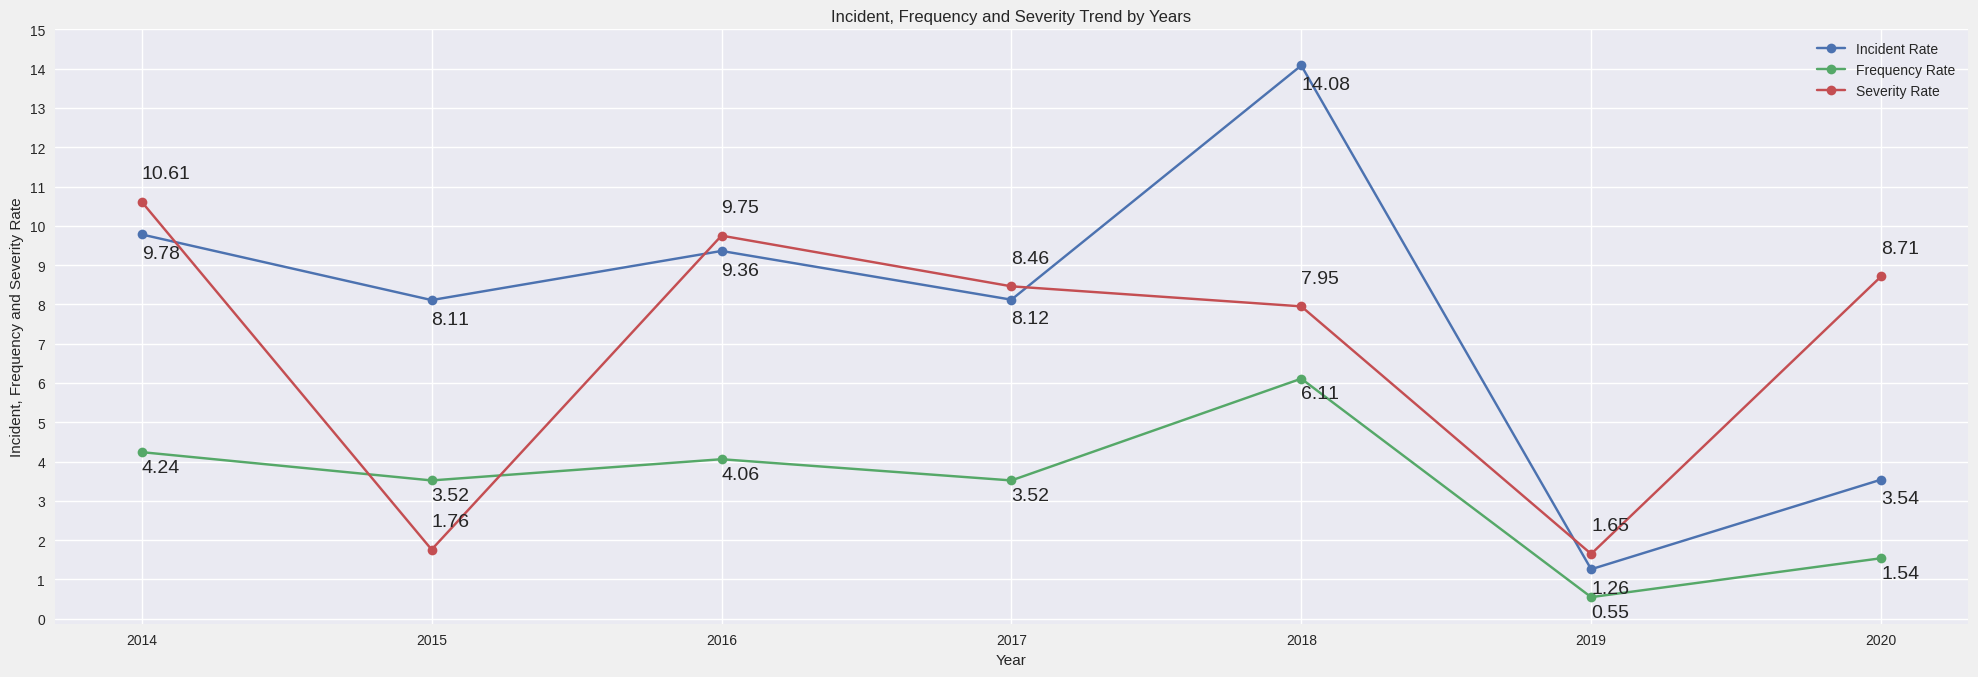

In [7]:
## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Data Gathering
x = df["Year"]
y = df["Incident Rate"]
z = df["Frequency Rate"]
g = df["Severity Rate"]

x_indexes = np.arange(len(x))

## Chart Plotting
plt.plot(x_indexes,y, marker="o",label="Incident Rate")
plt.plot(x_indexes,z, marker="o",label="Frequency Rate")
plt.plot(x_indexes,g, marker="o",label="Severity Rate")

## Title and Labelling
plt.title("Incident, Frequency and Severity Trend by Years")
plt.xlabel("Year")
plt.ylabel("Incident, Frequency and Severity Rate")
plt.xticks(x_indexes,x)
plt.yticks([y for y in range(0,16)])

## Value plotting in the chart
value_plotting(x_indexes,y,-0.6)
value_plotting(x_indexes,z,-0.5)
value_plotting(x_indexes,g,0.6)

plt.legend()
plt.tight_layout()
plt.show()

**<h1>Company Incident Rate vs National Incident Rate by Years</h1>**

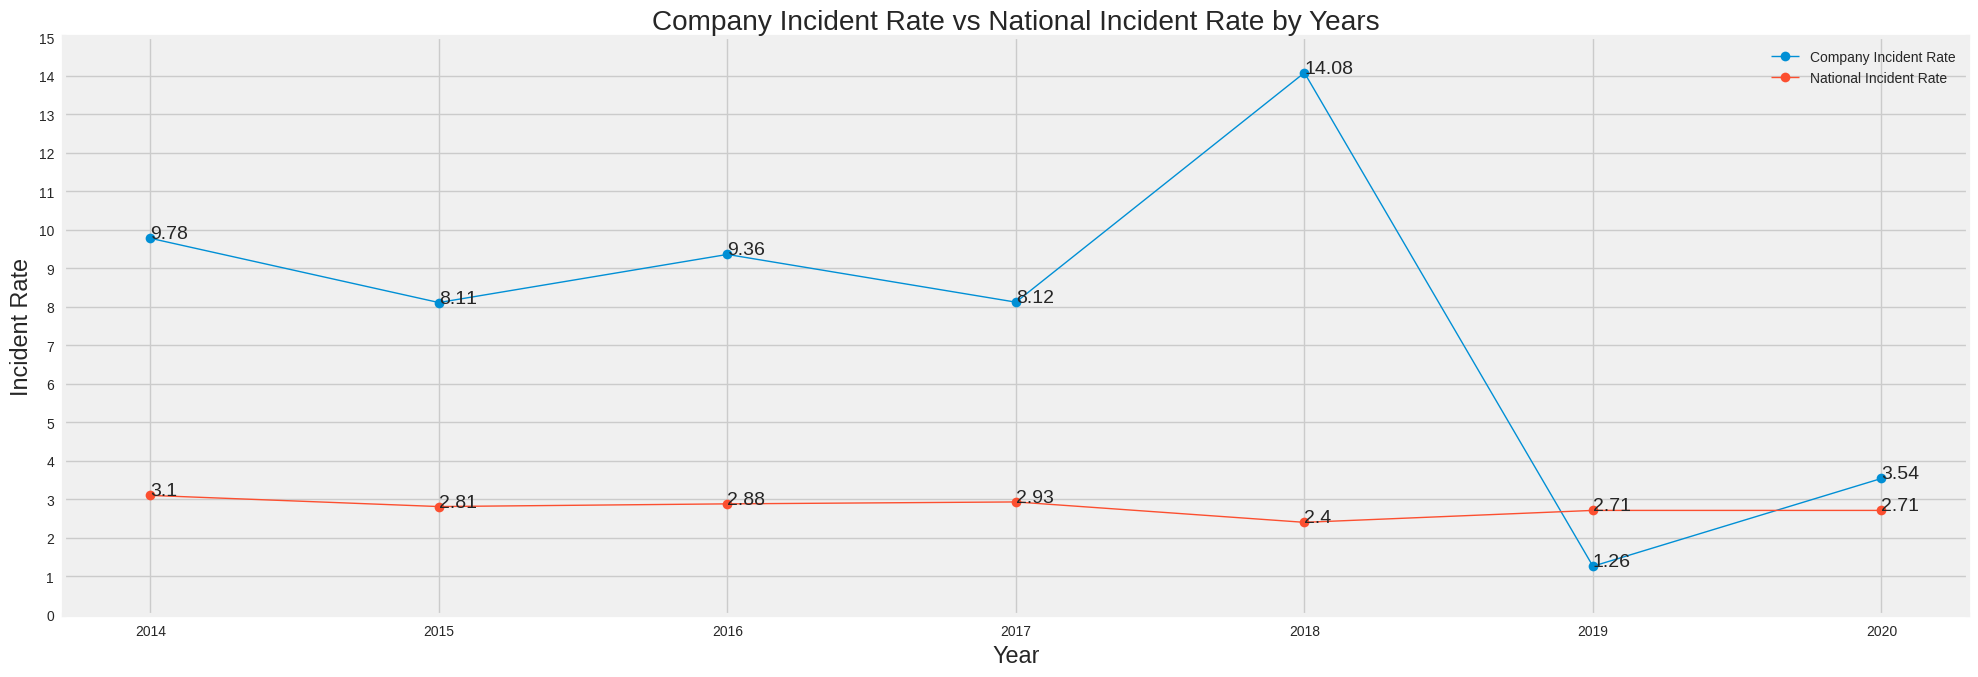

In [8]:
## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("fivethirtyeight")

## Data Gathering
year = df["Year"]
cir = df["Incident Rate"]
nir = df["National Incident Rate"]


x_indexes = np.arange(len(year))

## Chart Plotting
plt.plot(x_indexes,cir, marker="o", linewidth=1,label="Company Incident Rate")
plt.plot(x_indexes,nir, marker="o", linewidth=1,label="National Incident Rate")


## Title and Labelling
plt.title("Company Incident Rate vs National Incident Rate by Years")
plt.xlabel("Year")
plt.ylabel("Incident Rate")
plt.xticks(x_indexes,year)
plt.yticks([y for y in range(0,16)])

## Value plotting in the chart
value_plotting(x_indexes,cir,0)
value_plotting(x_indexes,nir,0)


plt.legend()
plt.tight_layout()
plt.show()

**<h1>Relationship of Incident Rate Trend and Loss day by Years</h1>**

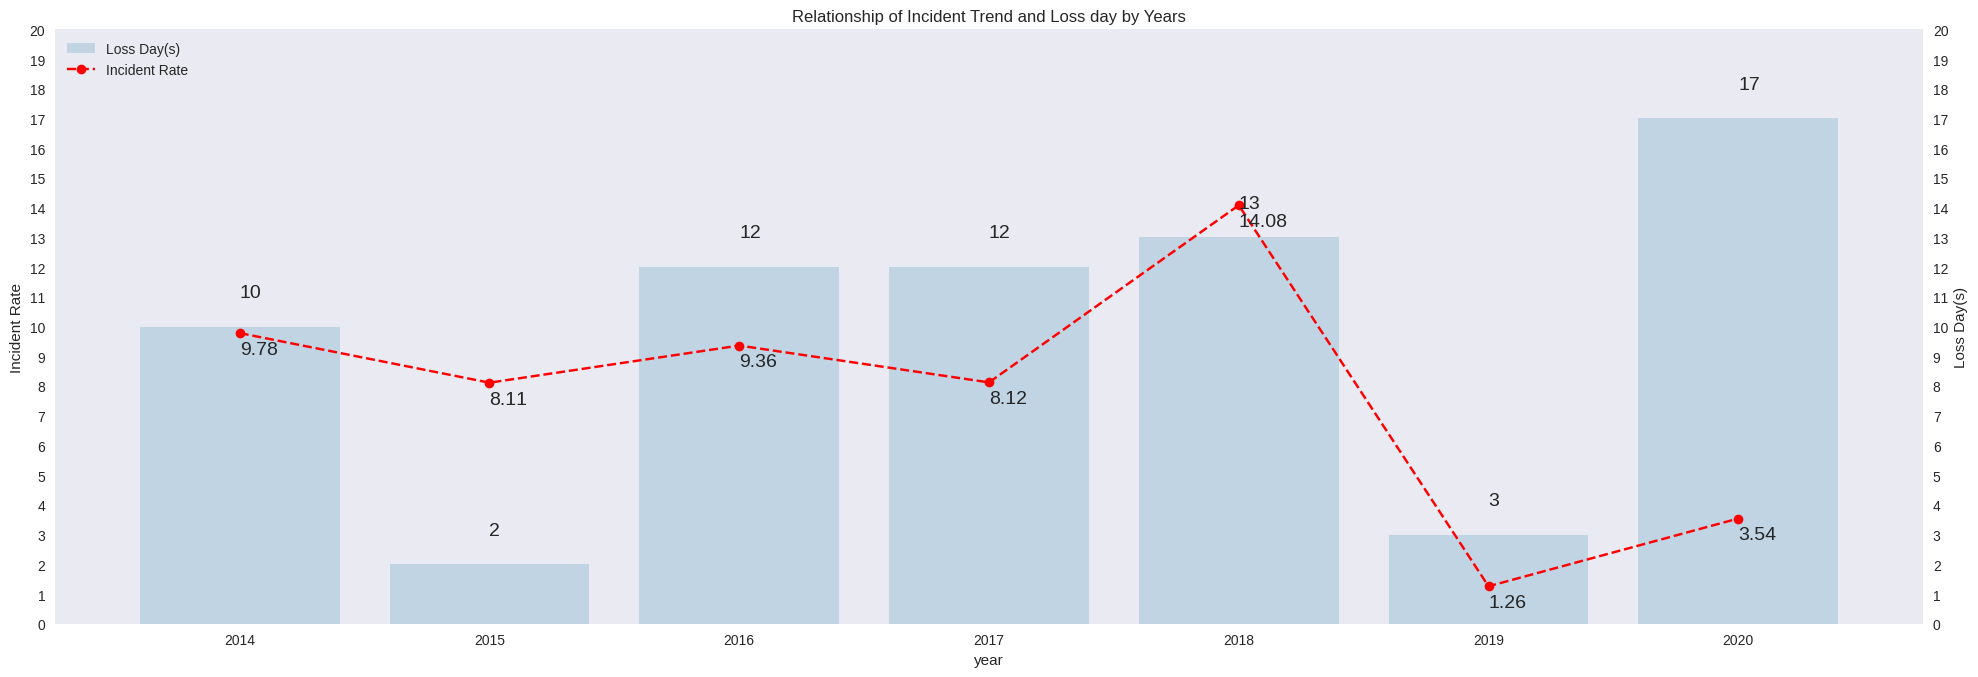

In [98]:
## Chart Size and Style
fig, ax1 = plt.subplots(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Data Gathering
year = df["Year"]
incident_rate = df["Incident Rate"]
loss_day = df["Loss Day"]

x_indexes = np.arange(len(year))

ax2 = ax1.twinx()
ax1.bar(x_indexes,loss_day,color="#b3cde0",alpha=0.75, label="Loss Day(s)")
ax2.plot(x_indexes,incident_rate, color="red", marker="o",linestyle="--",label="Incident Rate")

## Title and Labelling
ax1.set_title("Relationship of Incident Rate Trend and Loss day by Years")
ax1.set_xlabel("year")
ax1.set_ylabel("Incident Rate")
ax2.set_ylabel("Loss Day(s)")
ax1.set_xticks(x_indexes) 
ax1.set_xticklabels(year)
ax2.set_yticks([y for y in range(0,21)])
ax1.set_yticks([y for y in range(0,21)])

value_plotting(x_indexes,incident_rate,-0.7)
value_plotting(x_indexes,loss_day,1)

ax1.grid(False)
ax2.grid(False)
# ax1.legend()
# ax2.legend()
# fig.legend(loc=(0.04,0.88))
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


plt.tight_layout()
plt.show()


**<h1>Relationship of Severity Rate Trend and Loss day by Years</h1>**

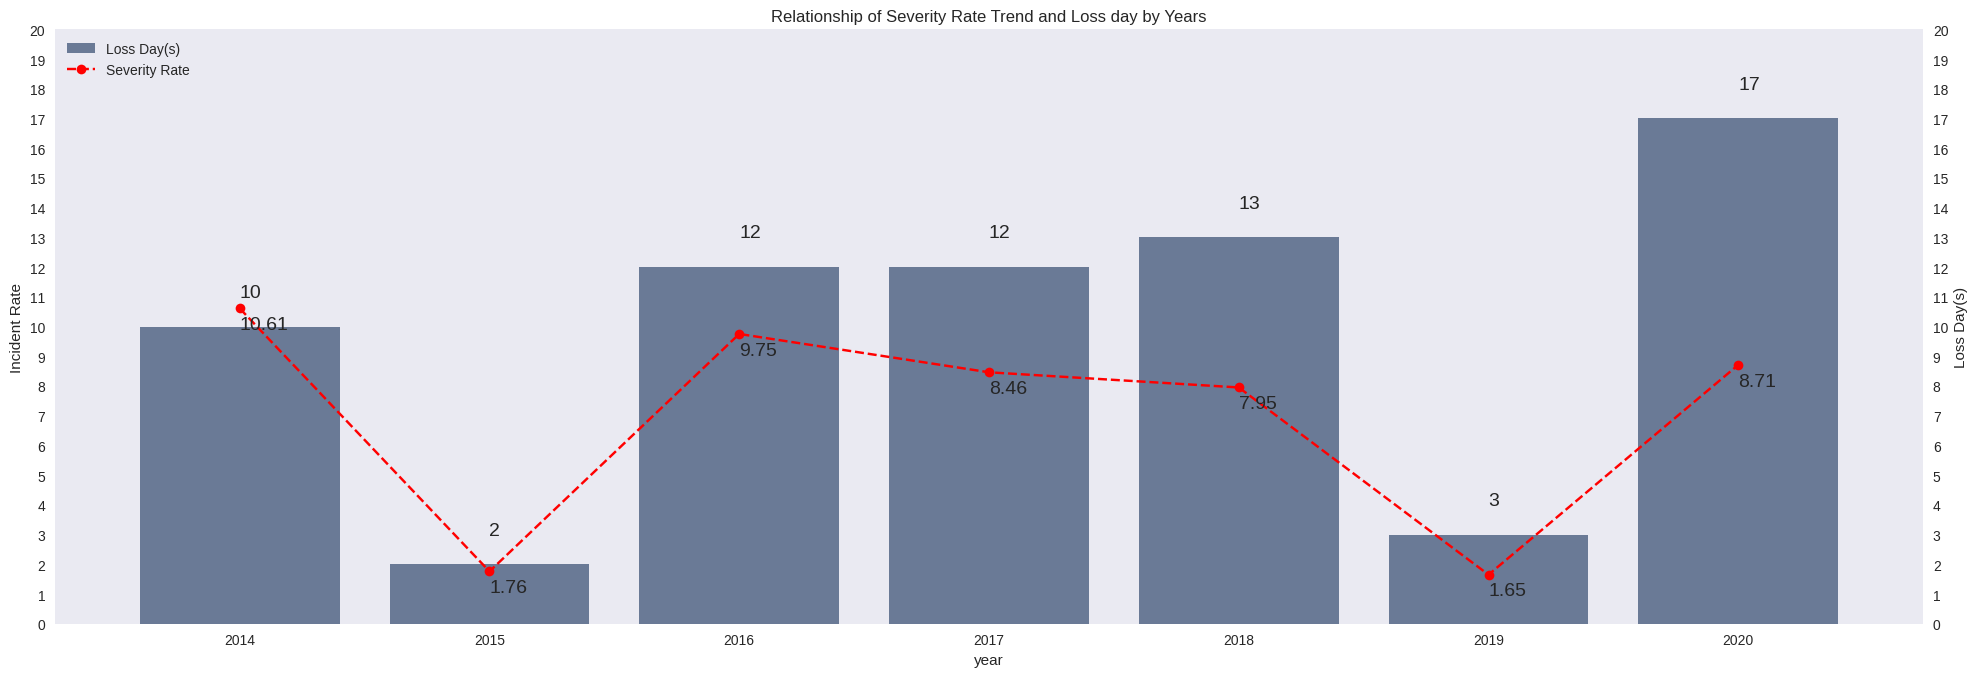

In [101]:
## Chart Size and Style
fig, ax1 = plt.subplots(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Data Gathering
year = df["Year"]
severity_trend = df["Severity Rate"]
loss_day = df["Loss Day"]

x_indexes = np.arange(len(year))

ax2 = ax1.twinx()
ax1.bar(x_indexes,loss_day,color="#011f4b",alpha=0.55, label="Loss Day(s)")
ax2.plot(x_indexes,severity_trend, color="red", marker="o",linestyle="--",label="Severity Rate")

## Title and Labelling
ax1.set_title("Relationship of Severity Rate Trend and Loss day by Years")
ax1.set_xlabel("year")
ax1.set_ylabel("Incident Rate")
ax2.set_ylabel("Loss Day(s)")
ax1.set_xticks(x_indexes) 
ax1.set_xticklabels(year)
ax2.set_yticks([y for y in range(0,21)])
ax1.set_yticks([y for y in range(0,21)])

value_plotting(x_indexes,severity_trend,-0.7)
value_plotting(x_indexes,loss_day,1)

ax1.grid(False)
ax2.grid(False)
# ax1.legend()
# ax2.legend()
# fig.legend(loc=(0.04,0.88))
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


plt.tight_layout()
plt.show()


**<h1>Relationship of Frequency Rate Trend and Incident Count by Years</h1>**

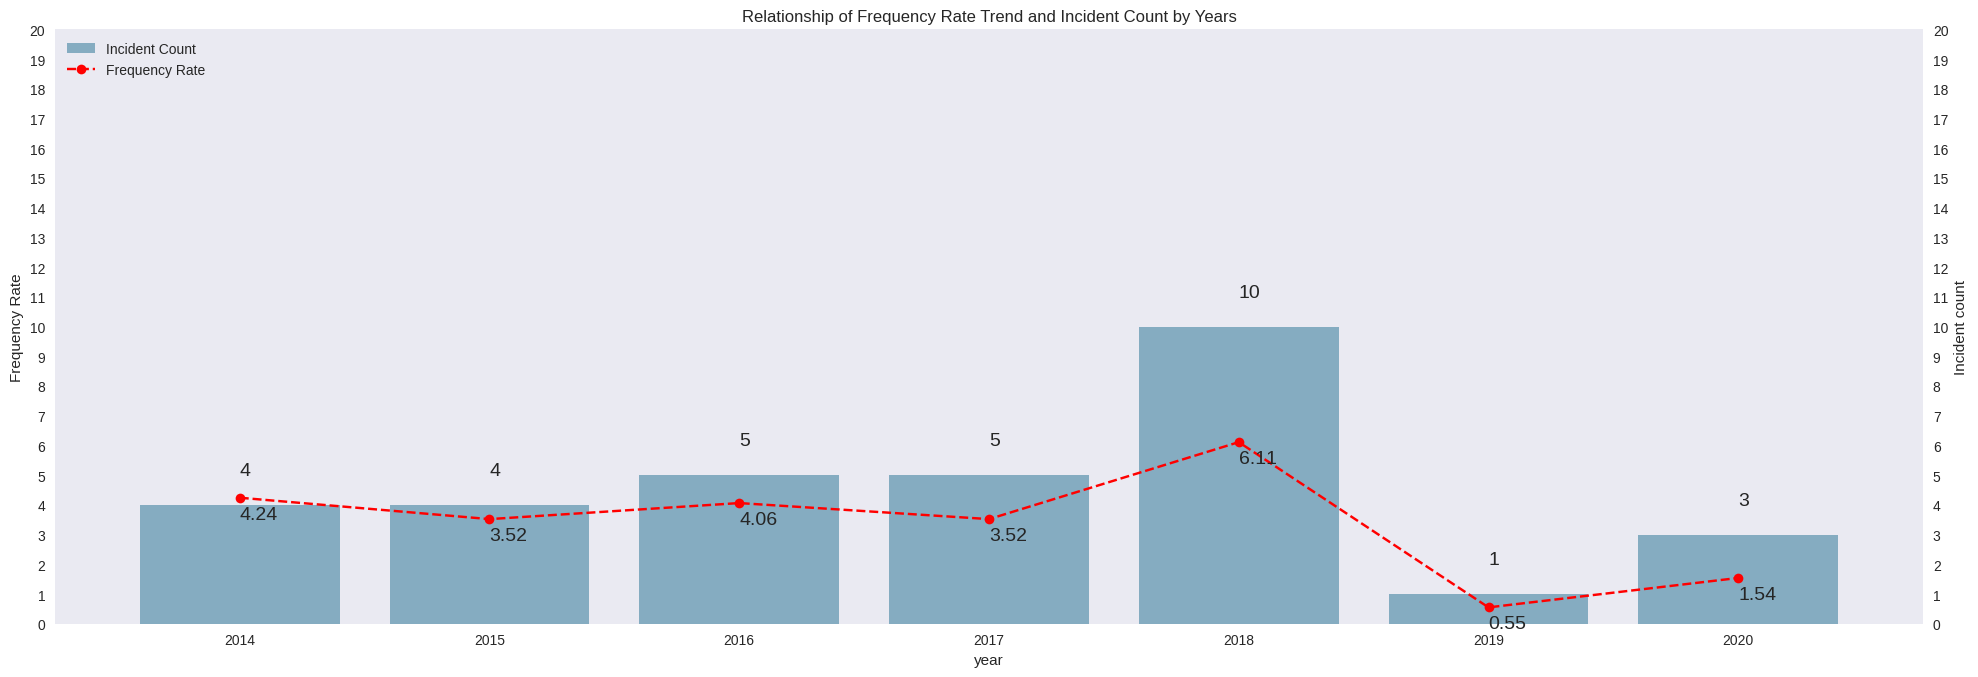

In [107]:
## Chart Size and Style
fig, ax1 = plt.subplots(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Data Gathering
year = df["Year"]
frequency_rate = df["Frequency Rate"]
incident_count= df["OSHA Case"]

x_indexes = np.arange(len(year))

ax2 = ax1.twinx()
ax1.bar(x_indexes,incident_count,color="#6497b1",alpha=0.75, label="Incident Count")
ax2.plot(x_indexes,frequency_rate, color="red", marker="o",linestyle="--",label="Frequency Rate")

## Title and Labelling
ax1.set_title("Relationship of Frequency Rate Trend and Incident Count by Years")
ax1.set_xlabel("year")
ax1.set_ylabel("Frequency Rate")
ax2.set_ylabel("Incident count")
ax1.set_xticks(x_indexes) 
ax1.set_xticklabels(year)
ax2.set_yticks([y for y in range(0,21)])
ax1.set_yticks([y for y in range(0,21)])

value_plotting(x_indexes,frequency_rate,-0.7)
value_plotting(x_indexes,incident_count,1)

ax1.grid(False)
ax2.grid(False)
# ax1.legend()
# ax2.legend()
# fig.legend(loc=(0.04,0.88))
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


plt.tight_layout()
plt.show()
